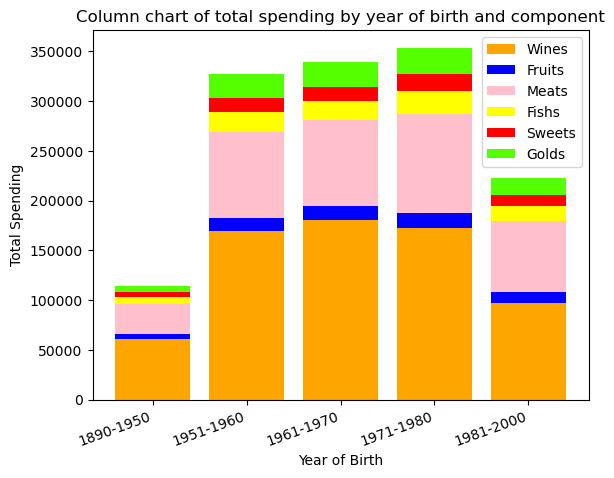

In [17]:
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
from pandasql import sqldf
import numpy as np
url = "https://raw.githubusercontent.com/PhiPhuongUyen/Team-5/main/marketing_campaign.csv"
df= pd.read_csv(url, sep="\t")
pysqldf = lambda q: sqldf(q, globals())
df
df1=pysqldf("SELECT ID, Year_Birth, Income, Dt_Customer, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth\
             FROM df")

df1
total_expenditure = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
df['Total Spending'] = total_expenditure

bins = [1890, 1950, 1960, 1970, 1980, 2000]
labels = ['1890-1950', '1951-1960', '1961-1970', '1971-1980', '1981-2000']
df['Khoảng năm sinh'] = pd.cut(df['Year_Birth'], bins=bins, labels=labels)
expenditure_by_age = df.groupby('Khoảng năm sinh')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

plt.bar(expenditure_by_age.index.astype(str), expenditure_by_age['MntWines'], color='orange', label='Wines')
plt.bar(expenditure_by_age.index.astype(str), expenditure_by_age['MntFruits'], bottom=expenditure_by_age['MntWines'], color='blue', label='Fruits')
plt.bar(expenditure_by_age.index.astype(str), expenditure_by_age['MntMeatProducts'], bottom=expenditure_by_age['MntWines'] + expenditure_by_age['MntFruits'], color='pink', label='Meats')
plt.bar(expenditure_by_age.index.astype(str), expenditure_by_age['MntFishProducts'], bottom=expenditure_by_age['MntWines'] + expenditure_by_age['MntFruits'] + expenditure_by_age['MntMeatProducts'], color='#FFFF00', label='Fishs')
plt.bar(expenditure_by_age.index.astype(str), expenditure_by_age['MntSweetProducts'], bottom=expenditure_by_age['MntWines'] + expenditure_by_age['MntFruits'] + expenditure_by_age['MntMeatProducts'] + expenditure_by_age['MntFishProducts'], color='red', label='Sweets')
plt.bar(expenditure_by_age.index.astype(str), expenditure_by_age['MntGoldProds'], bottom=expenditure_by_age['MntWines'] + expenditure_by_age['MntFruits'] + expenditure_by_age['MntMeatProducts'] + expenditure_by_age['MntFishProducts'] + expenditure_by_age['MntSweetProducts'], color='#55FF00', label='Golds')
colors = ['#FF0000', '#FF5500', '#FFAA00', '#FFFF00', '#AAFF00', '#55FF00']
alpha = 0.7

plt.xlabel('Year of Birth')
plt.ylabel('Total Spending')
plt.title('Column chart of total spending by year of birth and component')
plt.xticks(rotation=20, ha='right')
plt.legend()
plt.show()